In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

def preprocess_data(df):
    # Handle missing values
    imputer = SimpleImputer(strategy='most_frequent')
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = imputer.fit_transform(df[[column]])
    for column in df.select_dtypes(include=['number']).columns:
        df[column] = imputer.fit_transform(df[[column]])
    
    # Convert categorical variables to numerical
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = LabelEncoder().fit_transform(df[column])
    
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Separate features and target variable from training data
X = train_df.drop(['Transported', 'PassengerId'], axis=1)
y = train_df['Transported'].astype(int)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

# Prepare the test data
X_test = test_df.drop(['PassengerId'], axis=1)

# Predict using the trained model
predictions = model.predict(X_test)

# Create a DataFrame with the results
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': predictions.astype(bool)})

# Save the predictions to a CSV file
#output.to_csv('submission.csv', index=False)
print(output)


KeyboardInterrupt: 

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_image1.jpg'

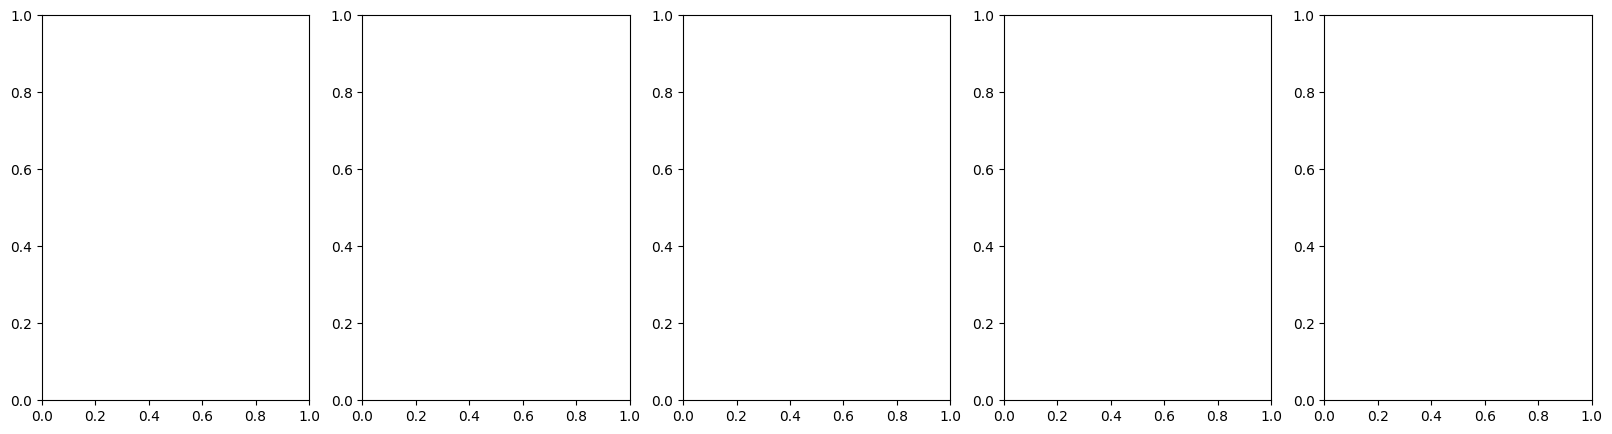

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to display images with predictions
def display_images_with_predictions(df, images_column, predictions, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i in range(num_images):
        ax = axes[i]
        image = plt.imread(df.iloc[i][images_column])
        ax.imshow(image)
        ax.set_title(f'Predicted: {predictions[i]}')
        ax.axis('off')
    plt.show()

# Example usage (assuming your dataset has an 'ImagePath' column)
# Let's create a dummy dataset for demonstration
image_paths = ['path_to_image1.jpg', 'path_to_image2.jpg', 'path_to_image3.jpg', 'path_to_image4.jpg', 'path_to_image5.jpg']
predictions = [True, False, True, False, True]  # Dummy predictions
dummy_df = pd.DataFrame({'ImagePath': image_paths})

# Display images with predictions
display_images_with_predictions(dummy_df, 'ImagePath', predictions)


In [1]:
import pandas as pd

# Load training data
train = pd.read_csv('train.csv')

# Display column names
print(train.columns.tolist())


['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib

# Load the train dataset
train_df = pd.read_csv('train.csv')

def preprocess_data(df):
    # Handle missing values for numerical columns
    numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    imputer_num = SimpleImputer(strategy='median')
    df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])
    
    # Handle missing values for categorical columns
    categorical_cols = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
    for col in categorical_cols:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Convert categorical variables to numerical
    df['CryoSleep'] = LabelEncoder().fit_transform(df['CryoSleep'])
    df['VIP'] = LabelEncoder().fit_transform(df['VIP'])
    
    # Convert categorical columns to dummy variables
    df = pd.get_dummies(df, columns=['HomePlanet', 'Destination'], drop_first=True)
    
    return df

# Preprocess the dataset
train_df = preprocess_data(train_df)

# Separate features and target variable from training data
X = train_df.drop(['Transported', 'PassengerId', 'Cabin', 'Name'], axis=1)  # Drop irrelevant columns
y = train_df['Transported']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model as a .pkl file
joblib.dump(model, 'spaceship_titanic_model.pkl')
print("Model saved as 'spaceship_titanic_model.pkl'")


Model saved as 'spaceship_titanic_model.pkl'
